In [87]:
import seaborn as sns
import pandas as pd

## Basic information about our dataset

In [88]:
df = pd.read_csv('./data/amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [89]:
df.shape

(9668, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [91]:
# country_grp = df.groupby('country').size().reset_index()
# print ((country_grp))
# sns.set(rc = {'figure.figsize':(10,40)})
# ax = sns.barplot(x = country_grp[0], y = country_grp.country)
# ax.set(xlabel="Number of movies/ TV shows in total", ylabel="country")

[Text(0.5, 0, 'Either movie or TV show'),
 Text(0, 0.5, 'Number of movies or TV shows')]

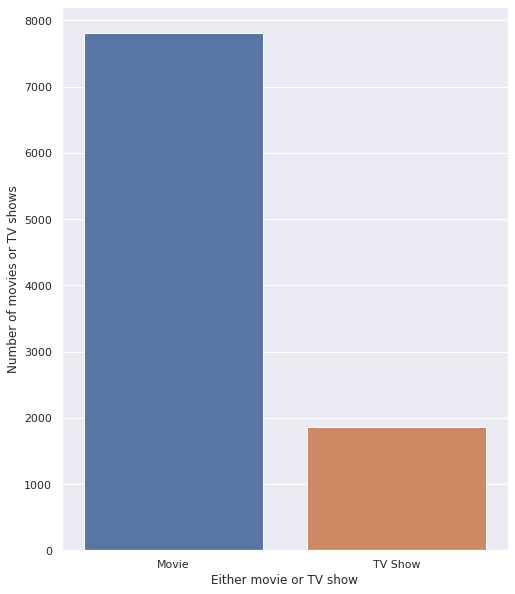

In [92]:
showtype = df['type'].value_counts().reset_index()
sns.set(rc = {'figure.figsize':(8,10)})
showtype.set_index('index', inplace=True)
ax = sns.barplot(x = showtype.index, y = showtype.type)
ax.set(xlabel = "Either movie or TV show", ylabel = "Number of movies or TV shows")

In [93]:
modern_movies = 0
movies_90s = 0
movies_80s = 0
old_movies = 0
very_old_movies = 0

for year in df['release_year']:
    if (year >= 2000):
        modern_movies += 1
    elif (year >= 1990):
        movies_90s += 1
    elif (year >= 1980):
        movies_80s += 1
    elif (year >= 1960):
        old_movies += 1
    else:
        very_old_movies += 1
# print("Modern movies: ", modern_movies)
# print("Old movies: ", old_movies)
# print("Very old movies: ", very_old_movies)
data = [['Older than 1960', very_old_movies],
['60s to 80s', old_movies],
['80s', movies_80s],
['90s', movies_90s],
['After 2000', modern_movies]
]
mdf = pd.DataFrame(data, columns=['Movie period', 'Number of Movies'])
mdf

,Movie period,Number of Movies
0,Older than 1960,487
1,60s to 80s,333
2,80s,299
3,90s,577
4,After 2000,7972


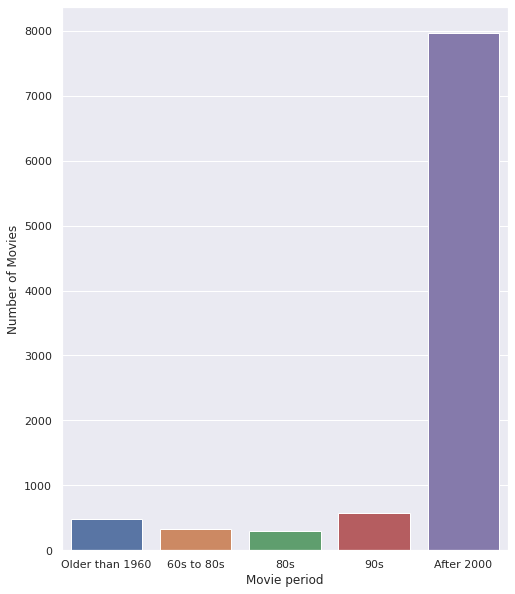

In [94]:
ax = sns.barplot(x = mdf['Movie period'], y = mdf['Number of Movies'])

In [95]:
count = 0
for item in df['listed_in']:
    if 'Fitness' in item:
        count += 1
# if(df['listed_in'].str.contains('Drama')):
    # count += 1
print(count)

83


In [96]:
listset = set()
for item in df['listed_in']:
    templist = item.split(',')
    for x in templist:
        x = x.strip()
        listset.add(x)
print(listset)

{'Suspense', 'TV Shows', 'Science Fiction', 'Young Adult Audience', 'Arthouse', 'Sports', 'Anime', 'Romance', 'Military and War', 'Historical', 'and Culture', 'Kids', 'Drama', 'Action', 'Entertainment', 'LGBTQ', 'Adventure', 'Talk Show and Variety', 'Music Videos and Concerts', 'Unscripted', 'Fantasy', 'Horror', 'International', 'Faith and Spirituality', 'Arts', 'Comedy', 'Animation', 'Special Interest', 'Documentary', 'Fitness', 'Western'}


In [97]:
listset.remove('and Culture')
listset.add('Culture')
print(listset)

{'Suspense', 'TV Shows', 'Science Fiction', 'Young Adult Audience', 'Arthouse', 'Sports', 'Anime', 'Romance', 'Military and War', 'Historical', 'Culture', 'Kids', 'Drama', 'Action', 'Entertainment', 'LGBTQ', 'Adventure', 'Talk Show and Variety', 'Music Videos and Concerts', 'Unscripted', 'Fantasy', 'Horror', 'International', 'Faith and Spirituality', 'Arts', 'Comedy', 'Animation', 'Special Interest', 'Documentary', 'Fitness', 'Western'}


In [98]:
cat_dict = {}
for item in listset:
    cat_dict[item] = 0
for item in listset:
    for x in df['listed_in']:
        if item in x:
            cat_dict[item] += 1

ldf = pd.DataFrame(cat_dict.items())
ldf.columns = ['Category', 'Number of Shows']
ldf = ldf.sort_values(by='Number of Shows', ascending=False)
print(ldf)


                     Category  Number of Shows
12                      Drama             3687
25                     Comedy             2099
13                     Action             1657
0                    Suspense             1501
11                       Kids             1085
28                Documentary              993
27           Special Interest              980
21                     Horror              875
7                     Romance              674
26                  Animation              547
14              Entertainment              483
24                       Arts              483
10                    Culture              483
2             Science Fiction              457
22              International              355
1                    TV Shows              263
16                  Adventure              259
30                    Western              234
5                      Sports              160
18  Music Videos and Concerts              155
19           

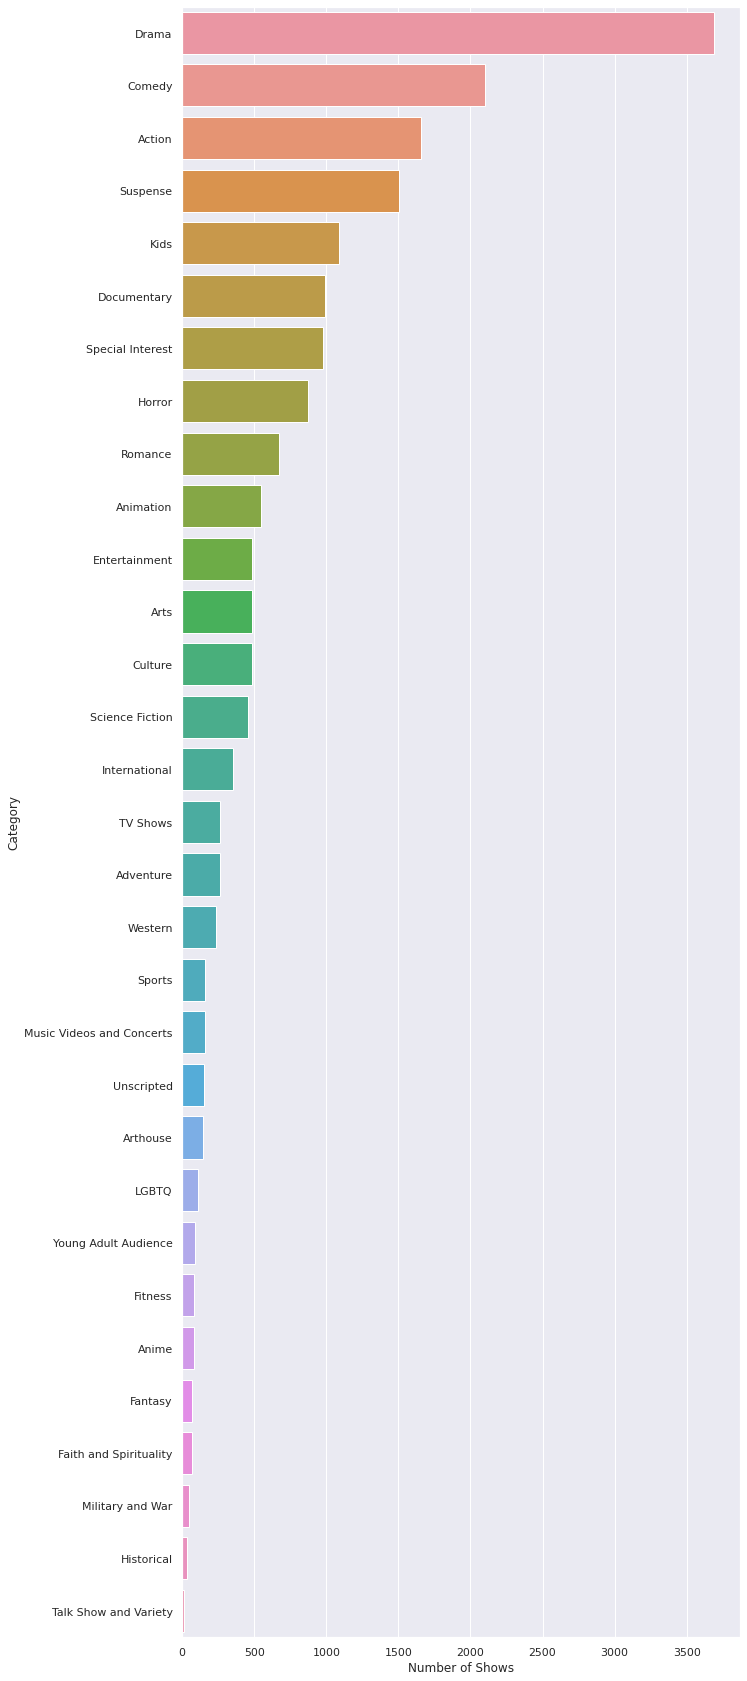

In [133]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=ldf['Number of Shows'], y=ldf['Category'])

In [100]:
countryset = set()
for item in df['country']:
    if (isinstance(item, str)):
        item = item.split(',')
        for x in item:
            x = x.strip()
            countryset.add(x)
print(countryset)


{'Kazakhstan', 'Iran', 'Denmark', 'Albania', 'Australia', 'Austria', 'Netherlands', 'Argentina', 'Japan', 'South Korea', 'Malaysia', 'Switzerland', 'Hungary', 'China', 'Belgium', 'South Africa', 'Afghanistan', 'Brazil', 'United Kingdom', 'Chile', 'Egypt', 'Italy', 'Thailand', 'Norway', 'Sweden', 'Monaco', 'United Arab Emirates', 'Georgia', 'India', 'New Zealand', 'Mexico', 'Czech Republic', 'Hong Kong', 'Singapore', 'France', 'Germany', 'United States', 'Kosovo', 'Spain', 'Canada', 'Luxembourg', 'Poland', 'Portugal', 'Ireland', 'Colombia'}


In [101]:
country_dict = {}
for item in countryset:
    country_dict[item] = 0
for item in countryset:
    for x in df['country']:
        if type(x) == str:
            if item in x:
                country_dict[item] += 1

cdf = pd.DataFrame(country_dict.items())
cdf.columns = ['Country', 'Number of Shows']
cdf = cdf.sort_values(by='Number of Shows', ascending=False)
cdf

,Country,Number of Shows
36,United States,334
28,India,246
18,United Kingdom,67
39,Canada,35
34,France,20
35,Germany,17
21,Italy,14
38,Spain,11
13,China,6
2,Denmark,6


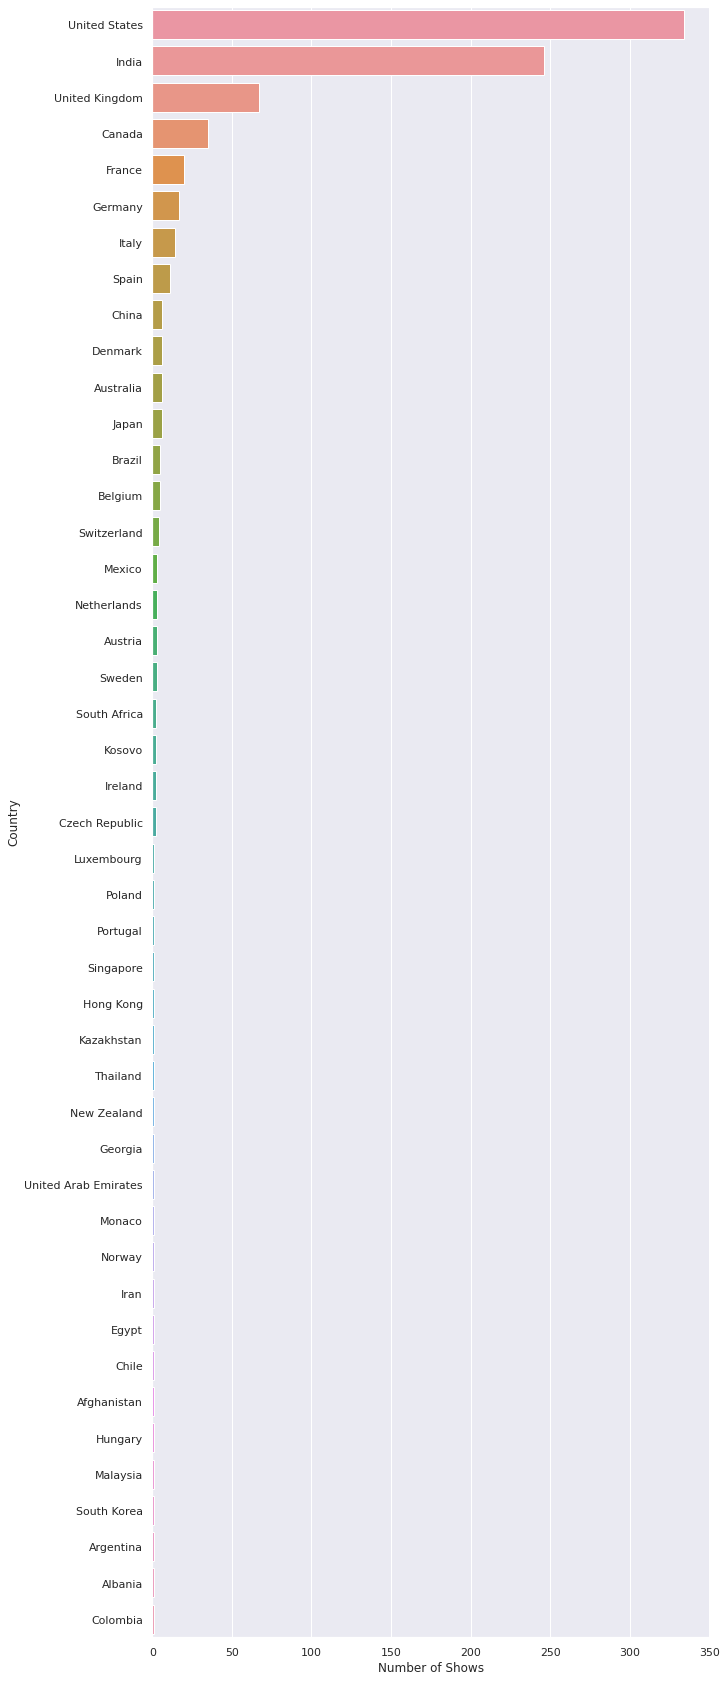

In [102]:
sns.set(rc = {'figure.figsize':(10,30)})
ax = sns.barplot(x=cdf['Number of Shows'], y=cdf['Country'])

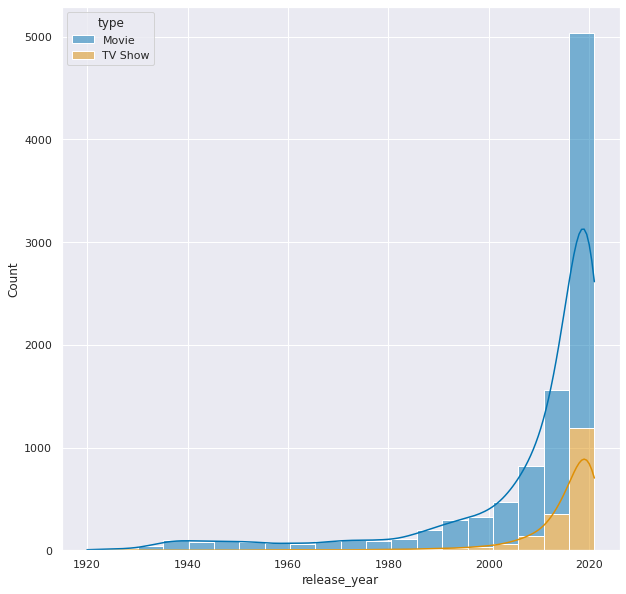

In [107]:
m2df = df['release_year'].reset_index()
sns.set(rc = {'figure.figsize':(10,10)})
custom_palette = sns.color_palette("colorblind")
sns.set_palette(custom_palette)
ax = sns.histplot(data=m2df, x='release_year', kde=True, bins=20, hue=df['type'], multiple='stack')

In [144]:
sports_count = 0
crime_count = 0
cooking_count = 0
spmatches = ['golf', 'baseball', 'volleyball', 'tennis', 'swimming', 'rugby', 'hockey', 'basketball', 'soccer', 'cricket', 'badminton', 'football']
crmatches = ['killer', 'serial killer', 'murder', 'psycho', 'stabbing']
comatches = ['vegetable', 'fruit', 'meat', 'chicken', 'beef', 'pork', 'pasta', 'noodle']

for item in df['description']:
    if any(x in item for x in spmatches):
        sports_count += 1
    if any(x in item for x in crmatches):
        crime_count += 1
    if any(x in item for x in comatches):
        cooking_count += 1
print(sports_count)
print(crime_count)
print(cooking_count)
sbdict = {'Sports':sports_count, 'Crime':crime_count, 'Cooking':cooking_count}
sbdf = pd.DataFrame(sbdict.items())
sbdf.columns = ['Derived Categories', 'Number of Shows']
sbdf

137
731
31


,Derived Categories,Number of Shows
0,Sports,137
1,Crime,731
2,Cooking,31


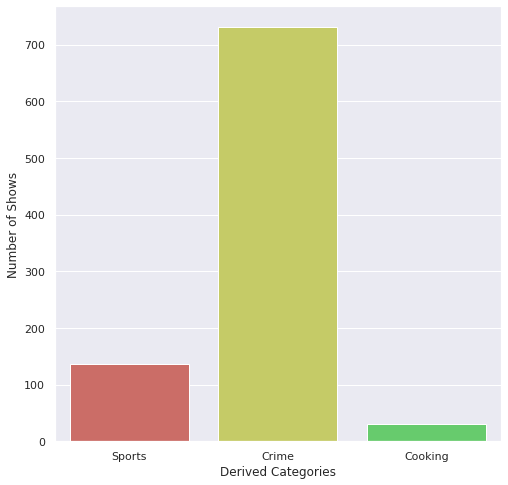

In [210]:
sns.set(rc = {'figure.figsize':(8,8)})
custom_palette = sns.color_palette("hls",6)
sns.set_palette(custom_palette)
ax = sns.barplot(x=sbdf['Derived Categories'], y=sbdf['Number of Shows'])